<a href="https://colab.research.google.com/github/Harsha-2005/Elevate-Labs-AI-and-ML-Internship/blob/main/Elevate_Labs_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#reading the DataFrame
df=pd.read_csv('Housing.csv')

In [5]:
df.head() #gives us the first five rows of the dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.describe(include='all') #gives us the statistical summary of the numerical columns and categorical columns in a DataFrame

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [7]:
df.info() #provides a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.shape
print(f"No of Rows: {df.shape[0]}")
print(f"No of columns: {df.shape[1]}")


No of Rows: 545
No of columns: 13


In [9]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [10]:
#apply binary encoding for the binary categorical values
binary_cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[binary_cols]=df[binary_cols].apply(lambda x:x.map({'yes':1,'no':0}))

In [11]:
furnishing_dummies=pd.get_dummies(df['furnishingstatus'],prefix='furnishing',drop_first=True)

In [12]:
#here i am deleting the original furnishingstatus column and adding the frunishing_dummies column to the original dataframe
df=pd.concat([df,furnishing_dummies],axis=1)
df.drop('furnishingstatus',axis=1,inplace=True)

In [13]:
X=df.drop('price',axis=1)
y=df['price']
num_cols=['area','bedrooms','bathrooms','stories','parking']
scaler=StandardScaler()
X[num_cols]=scaler.fit_transform(X[num_cols])


In [14]:
#after preprocessing of the data looks like this
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,False,False
1,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,False,False
2,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,True,False
3,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,False,False
4,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,False,False


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   area                       545 non-null    float64
 1   bedrooms                   545 non-null    float64
 2   bathrooms                  545 non-null    float64
 3   stories                    545 non-null    float64
 4   mainroad                   545 non-null    int64  
 5   guestroom                  545 non-null    int64  
 6   basement                   545 non-null    int64  
 7   hotwaterheating            545 non-null    int64  
 8   airconditioning            545 non-null    int64  
 9   parking                    545 non-null    float64
 10  prefarea                   545 non-null    int64  
 11  furnishing_semi-furnished  545 non-null    bool   
 12  furnishing_unfurnished     545 non-null    bool   
dtypes: bool(2), float64(5), int64(6)
memory usage: 48.

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
feature_names=X_train.columns
print(feature_names)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishing_semi-furnished', 'furnishing_unfurnished'],
      dtype='object')


In [19]:
coefficients=lr.coef_
intercept=lr.intercept_
print(f"Coefficient: {coefficients}")
print(f"Intercept: {intercept}")

Coefficient: [ 549164.54164962   59649.5044      559614.4809304   361644.23977858
  408073.6819066   275710.53305175  482603.52188223  616375.42271861
  685839.34559965  260916.61906937  509192.08881309 -121652.66300036
 -391191.24078511]
Intercept: 4037655.703022479


In [21]:
y_pred = lr.predict(X_test)

# 2. Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# 3. Print the results
print("--- Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

--- Model Evaluation Metrics ---
Mean Absolute Error (MAE): 920,392.94
Mean Squared Error (MSE): 1,523,019,469,501.29
Root Mean Squared Error (RMSE): 1,234,106.75
R-squared (R²): 0.6463


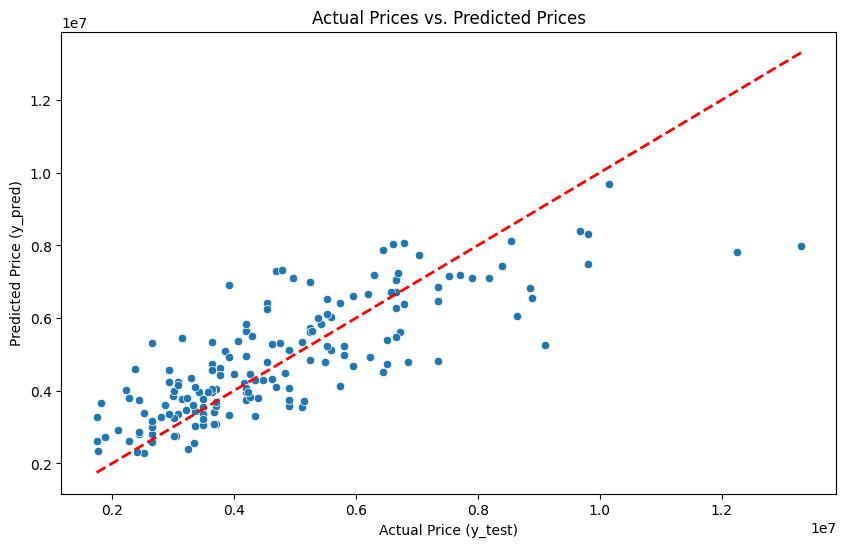

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
min_val=min(y_test.min(),y_pred.min())
max_val=max(y_test.max(),y_pred.max())
plt.plot([min_val,max_val],[min_val,max_val],linestyle='--',color='red',linewidth=2)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Price (y_test)')
plt.ylabel('Predicted Price (y_pred)')

plt.show()


In [23]:
coeff_df=pd.DataFrame(coefficients,index=feature_names,columns=['Coefficient'])
coeff_df['Absolute_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(
    by='Absolute_Coefficient',
    ascending=False
).drop(columns=['Absolute_Coefficient'])

print("--- Model Coefficients (Sorted by Magnitude) ---")
print(coeff_df.to_markdown(numalign="left", stralign="left"))

--- Model Coefficients (Sorted by Magnitude) ---
|                           | Coefficient   |
|:--------------------------|:--------------|
| airconditioning           | 685839        |
| hotwaterheating           | 616375        |
| bathrooms                 | 559614        |
| area                      | 549165        |
| prefarea                  | 509192        |
| basement                  | 482604        |
| mainroad                  | 408074        |
| furnishing_unfurnished    | -391191       |
| stories                   | 361644        |
| guestroom                 | 275711        |
| parking                   | 260917        |
| furnishing_semi-furnished | -121653       |
| bedrooms                  | 59649.5       |


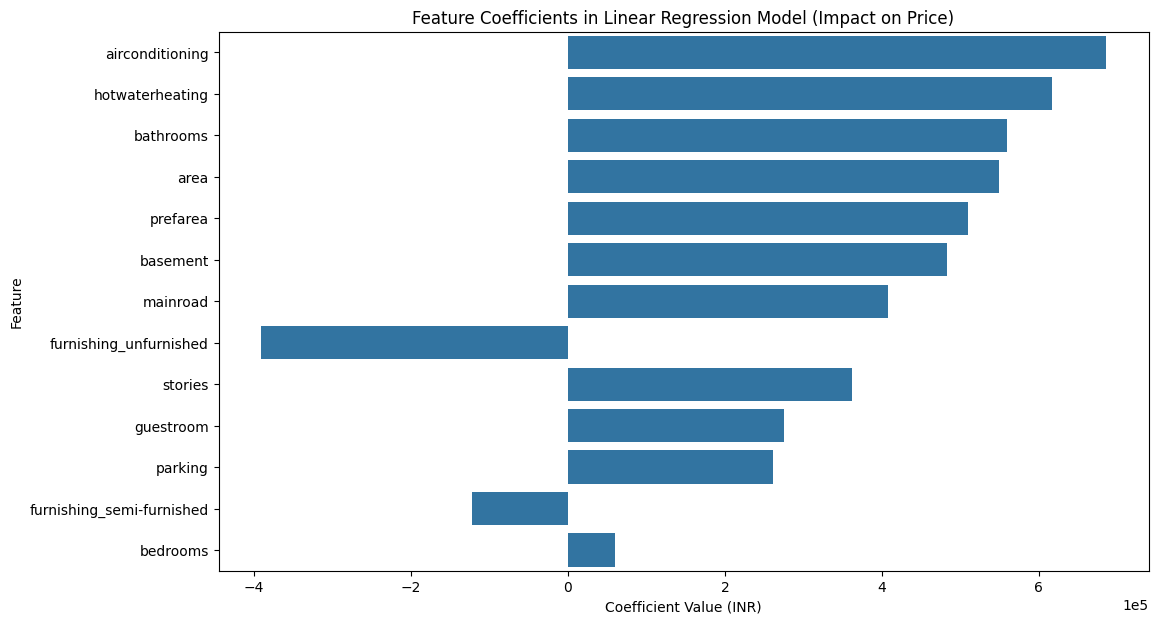

In [26]:
plt.figure(figsize=(12, 7))
sns.barplot(x=coeff_df['Coefficient'],y=coeff_df.index)
plt.title('Feature Coefficients in Linear Regression Model (Impact on Price)')
plt.xlabel('Coefficient Value (INR)')
plt.ylabel('Feature')
# Format the x-axis to prevent clutter by using scientific notation
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

### 1. Data Preparation and Preprocessing

The dataset, containing $\mathbf{545}$ non-null entries and $\mathbf{13}$ features, was first preprocessed to prepare it for the regression model:

* **Feature Identification:** The target variable was `price`, with features including size (`area`, `bedrooms`, `bathrooms`, `stories`, `parking`), amenities (`airconditioning`, `hotwaterheating`, etc.), and categorical data (`furnishingstatus`).
* **Encoding:** All binary features (e.g., `mainroad`, `guestroom` with 'yes'/'no' values) were mapped to $\mathbf{1}$ and $\mathbf{0}$. The multi-category feature, `furnishingstatus`, was transformed using **one-hot encoding** into two new dummy variables: `furnishing_semi-furnished` and `furnishing_unfurnished`.
* **Feature Scaling:** All primary numerical features (`area`, `bedrooms`, `bathrooms`, `stories`, `parking`) were **Standardized** using `StandardScaler`. This essential step ensures that features with larger numerical ranges do not disproportionately influence the model's coefficients.

***

### 2. Data Splitting and Model Training

* **Train-Test Split:** The cleaned data was split into a $\mathbf{70\%}$ training set ($\mathbf{381}$ samples) and a $\mathbf{30\%}$ testing set ($\mathbf{164}$ samples) for out-of-sample evaluation.
* **Model Training:** A `LinearRegression` model was trained on the $\mathbf{X\_train}$ and $\mathbf{y\_train}$ datasets.

***

### 3. Feature Importance (Coefficients) and Interpretation

The trained model’s coefficients were analyzed to determine the impact of each feature on the predicted price. The model **Intercept** (the base price when all scaled features are zero) was found to be **INR 4,037,655.70**.

The most influential features, based on the magnitude of their standardized coefficients, were:

1.  $\mathbf{airconditioning}$ (Coefficient: $\mathbf{+685,839}$): The strongest positive price predictor.
2.  $\mathbf{hotwaterheating}$ (Coefficient: $\mathbf{+616,375}$): The second most impactful positive amenity.
3.  $\mathbf{bathrooms}$ (Coefficient: $\mathbf{+559,614}$): A major driver of value related to house size.
4.  $\mathbf{area}$ (Coefficient: $\mathbf{+549,165}$): The fundamental positive predictor of house value.
5.  $\mathbf{furnishing\_unfurnished}$ (Coefficient: $\mathbf{-391,191}$): The largest negative factor, showing a significant price reduction compared to a 'furnished' house.

***

### 4. Model Evaluation

The model's performance was evaluated on the unseen test data ($\mathbf{X\_test}$ and $\mathbf{y\_test}$) using standard metrics:

| Metric | Value |
| :--- | :--- |
| **R-squared ($\mathbf{R^2}$)** | $\mathbf{0.6463}$ |
| **Mean Absolute Error (MAE)** | $\mathbf{920,392.94}$ |
| **Root Mean Squared Error (RMSE)** | $\mathbf{1,234,106.75}$ |

The $\mathbf{R^2}$ value of $\mathbf{0.6463}$ indicates that the model explains about **$64.63\%$** of the variability in house prices, suggesting a reasonably good fit. The $\mathbf{MAE}$ shows that the model's average prediction error is approximately $\mathbf{\text{INR } 9.20}$ Lakhs.